In [529]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.signal import filtfilt
from scipy import signal

In [606]:
data_raw_df = pd.read_csv("./dataset_sub1/physiologica_lsub_1.csv")
anno_raw_df = pd.read_csv("./dataset_sub1/annotation_sub_1.csv")
data_df = pd.DataFrame(data_raw_df,columns=["gsr","emg_zygo","emg_coru","emg_trap","bvp"])
anno_df = pd.DataFrame(anno_raw_df,columns=["valence","arousal","video"])

In [609]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns.values.tolist():
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name] = (df[feature_name] - mean_value) / (std_value)
    return result

Text(0.5, 0, 'gsr')

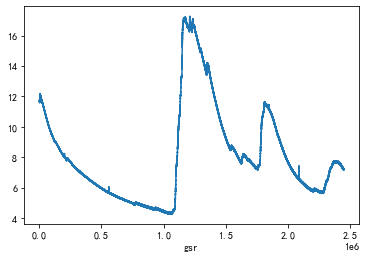

In [552]:
plt.plot(data_df["gsr"])
plt.xlabel("gsr")

Text(0.5, 0, 'emg_zygo')

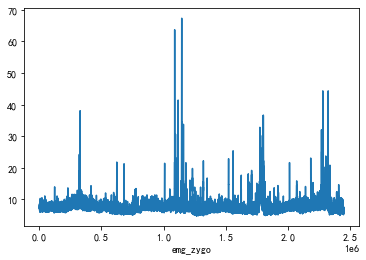

In [554]:
plt.plot(data_df["emg_zygo"])
plt.xlabel("emg_zygo")

Text(0.5, 0, 'gsr_filtered')

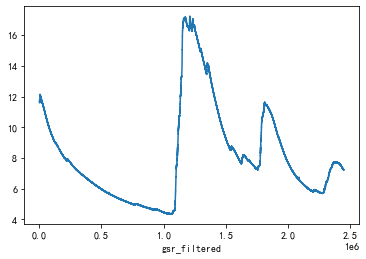

In [556]:
# filtering
# first-order butterworth
fs = 1000
fc = 50
Wn = fc/(fs/2)
order = 1
b, a = signal.butter(order, Wn, 'low')
data_filtered = pd.DataFrame(index=data_df.index,columns=data_df.columns)
for i in range(data_df.shape[1]):
    data_filtered.iloc[:,i] = filtfilt(b, a, data_df.iloc[:,i])

plt.plot(data_filtered["gsr"])
plt.xlabel("gsr_filtered")

In [610]:
normalized_anno_df = normalize(anno_df)

Text(0, 0.5, 'valence')

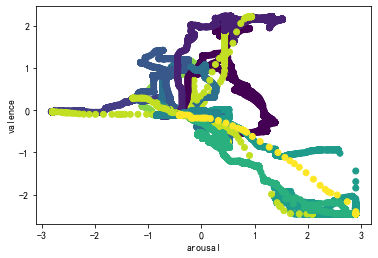

In [611]:
# valence: degree of being pleasant arousal:degree of excitedness

plt.scatter(normalized_anno_df["arousal"],normalized_anno_df["valence"],label='valence',c = anno_df["video"])
plt.xlabel("arousal")
plt.ylabel("valence")

In [558]:
# define the windows size 50ms in raw data, sampling frequency = 1000Hz
n =1000 # window = 1000 ms
N = int(data_filtered.shape[0]/n) # number of data 

49032

In [562]:
# group the data
data_to_analysis = pd.DataFrame(data_filtered,columns=["gsr","emg_zygo","emg_coru","emg_trap","bvp"])# eliminate the time column
raw_data_grouped = data_to_analysis.groupby(lambda x: math.floor(x/n))
# group the annotation 
anno_to_analysis = pd.DataFrame(anno_raw_df,columns=["valence","arousal"])
anno_grouped = anno_to_analysis.groupby(lambda x: math.floor(x/(n/50)))
anno_df = anno_grouped.mean()
print(N,anno_df.shape[0])

2451 2452


gsr valence
r = -0.154，p =  0.000
gsr arousal
r =  0.111，p =  0.000
emg_zygo valence
r = -0.129，p =  0.000
emg_zygo arousal
r =  0.204，p =  0.000
emg_coru valence
r =  0.340，p =  0.000
emg_coru arousal
r =  0.199，p =  0.000
emg_trap valence
r = -0.118，p =  0.000
emg_trap arousal
r =  0.126，p =  0.000
bvp valence
r =  0.017，p =  0.414
bvp arousal
r = -0.008，p =  0.704


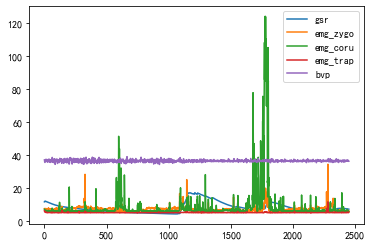

In [563]:
# Look ar the mean
data_mean = raw_data_grouped.mean()

data_mean.plot()
# linear correlation analysis
for phys_name in data_mean.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_mean[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated
#         # spearman
#         rho, pval = stats.spearmanr(x, y)
#         print('rho = %6.3f，pval = %6.3f'%(rho,pval))
#         # kendall 
#         tau, p_value = stats.kendalltau(x,y)
#         print('tau = %6.3f，p_value = %6.3f'%(tau,p_value))

gsr valence
r = -0.154，p =  0.000
gsr arousal
r =  0.111，p =  0.000
emg_zygo valence
r = -0.119，p =  0.000
emg_zygo arousal
r =  0.192，p =  0.000
emg_coru valence
r =  0.339，p =  0.000
emg_coru arousal
r =  0.197，p =  0.000
emg_trap valence
r = -0.118，p =  0.000
emg_trap arousal
r =  0.135，p =  0.000
bvp valence
r =  0.034，p =  0.091
bvp arousal
r = -0.025，p =  0.223


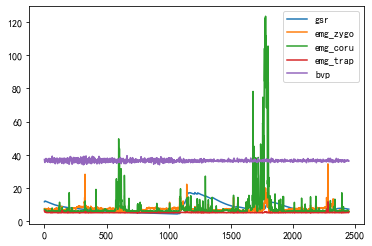

In [564]:
# the median
data_median = raw_data_grouped.median()
data_median.plot()
for phys_name in data_median.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_median[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

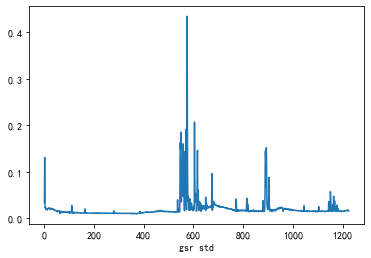

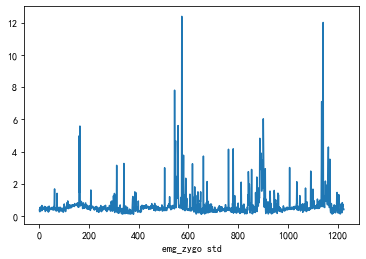

gsr valence
r = -0.247，p =  0.000
gsr arousal
r =  0.365，p =  0.000
emg_zygo valence
r = -0.139，p =  0.000
emg_zygo arousal
r =  0.235，p =  0.000
emg_coru valence
r =  0.340，p =  0.000
emg_coru arousal
r =  0.215，p =  0.000
emg_trap valence
r = -0.098，p =  0.001
emg_trap arousal
r =  0.041，p =  0.154
bvp valence
r = -0.129，p =  0.000
bvp arousal
r = -0.049，p =  0.084


In [382]:
# the std
data_std = raw_data_grouped.std()
plt.plot(data_std["gsr"])
plt.xlabel("gsr std")
plt.show()
plt.plot(data_std["emg_zygo"])
plt.xlabel("emg_zygo std")
plt.show()

for phys_name in data_std.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_std[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

gsr valence
r = -0.153，p =  0.000
gsr arousal
r =  0.109，p =  0.000
emg_zygo valence
r = -0.098，p =  0.000
emg_zygo arousal
r =  0.173，p =  0.000
emg_coru valence
r =  0.339，p =  0.000
emg_coru arousal
r =  0.197，p =  0.000
emg_trap valence
r = -0.116，p =  0.000
emg_trap arousal
r =  0.167，p =  0.000
bvp valence
r =  0.078，p =  0.000
bvp arousal
r =  0.118，p =  0.000


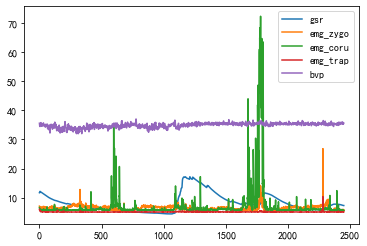

In [565]:
# the min
data_min = raw_data_grouped.min()
data_min.plot()
for phys_name in data_min.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_min[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

gsr valence
r = -0.157，p =  0.000
gsr arousal
r =  0.115，p =  0.000
emg_zygo valence
r = -0.186，p =  0.000
emg_zygo arousal
r =  0.281，p =  0.000
emg_coru valence
r =  0.344，p =  0.000
emg_coru arousal
r =  0.214，p =  0.000
emg_trap valence
r = -0.109，p =  0.000
emg_trap arousal
r =  0.052，p =  0.070
bvp valence
r = -0.106，p =  0.000
bvp arousal
r =  0.149，p =  0.000


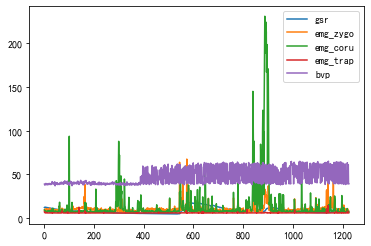

In [384]:
# the max
data_max = raw_data_grouped.max()
data_max.plot()
for phys_name in data_max.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_max[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

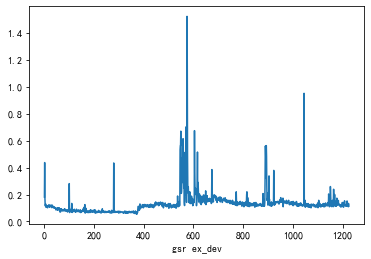

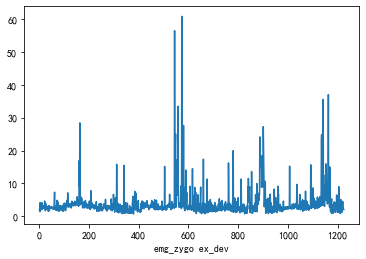

gsr valence
r = -0.254，p =  0.000
gsr arousal
r =  0.364，p =  0.000
emg_zygo valence
r = -0.177，p =  0.000
emg_zygo arousal
r =  0.275，p =  0.000
emg_coru valence
r =  0.339，p =  0.000
emg_coru arousal
r =  0.214，p =  0.000
emg_trap valence
r = -0.092，p =  0.001
emg_trap arousal
r =  0.020，p =  0.492
bvp valence
r = -0.106，p =  0.000
bvp arousal
r =  0.145，p =  0.000


In [432]:
# the max-min
data_ex_dev = raw_data_grouped.max()-raw_data_grouped.min()
plt.plot(data_ex_dev["gsr"])
plt.xlabel("gsr ex_dev")
plt.show()
plt.plot(data_ex_dev["emg_zygo"])
plt.xlabel("emg_zygo ex_dev")
plt.show()

for phys_name in data_ex_dev.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_ex_dev[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

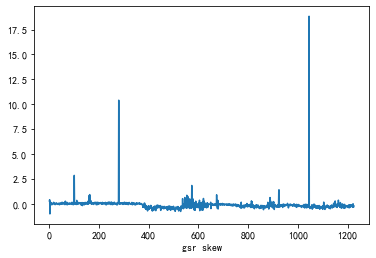

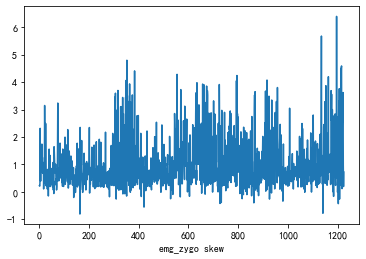

gsr valence
r = -0.007，p =  0.814
gsr arousal
r = -0.018，p =  0.535
emg_zygo valence
r = -0.058，p =  0.043
emg_zygo arousal
r =  0.013，p =  0.647
emg_coru valence
r = -0.079，p =  0.005
emg_coru arousal
r =  0.004，p =  0.879
emg_trap valence
r =  0.014，p =  0.618
emg_trap arousal
r = -0.104，p =  0.000
bvp valence
r = -0.018，p =  0.525
bvp arousal
r =  0.094，p =  0.001


In [386]:
# the skew
data_skew = raw_data_grouped.skew()
plt.plot(data_skew["gsr"])
plt.xlabel("gsr skew")
plt.show()
plt.plot(data_skew["emg_zygo"])
plt.xlabel("emg_zygo skew")
plt.show()

for phys_name in data_skew.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_skew[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

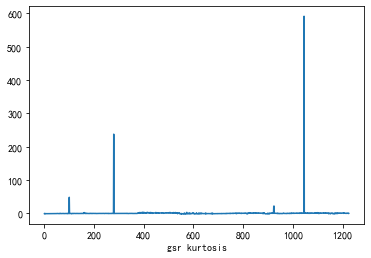

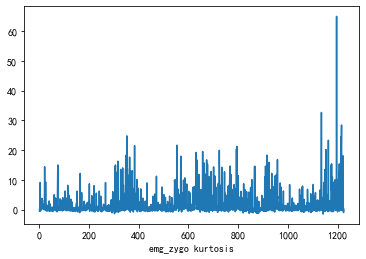

gsr arousal
r = -0.010，p =  0.728
emg_zygo arousal
r = -0.059，p =  0.039
emg_coru arousal
r = -0.034，p =  0.240
emg_trap arousal
r = -0.060，p =  0.035
bvp arousal
r =  0.066，p =  0.020


In [430]:
# the kurtosis
data_kurtosis = raw_data_grouped.apply(pd.DataFrame.kurt)
plt.plot(data_kurtosis["gsr"])
plt.xlabel("gsr kurtosis")
plt.show()
plt.plot(data_kurtosis["emg_zygo"])
plt.xlabel("emg_zygo kurtosis")
plt.show()
for phys_name in data_kurtosis.columns.values.tolist():
    for anno_name in anno_df.columns.values.tolist():
        x = data_kurtosis[phys_name]
        y = anno_df[anno_name]
        print(phys_name,anno_name)
        # pearson
        r,p = stats.pearsonr(x,y)  #
        print('r = %6.3f，p = %6.3f'%(r,p)) # if|r|<0.3 they are not linear correlated

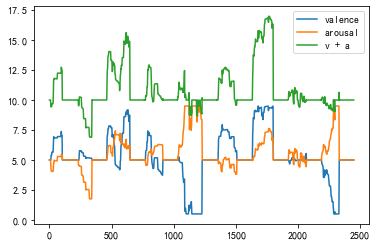

In [566]:
# valence: degree of being pleasant
plt.plot(anno_df["valence"],label='valence')

# arousal:degree of excitedness
plt.plot(anno_df["arousal"],label="arousal")

plt.plot(anno_df["valence"]+anno_df["arousal"],label="v + a")
plt.legend()

In [390]:
data_mean["gsr"][0:100]

0     11.663924
1     11.762607
2     12.110406
3     12.090537
4     12.027994
        ...    
95     8.141046
96     8.114070
97     8.087529
98     8.061252
99     8.038903
Name: gsr, Length: 100, dtype: float64

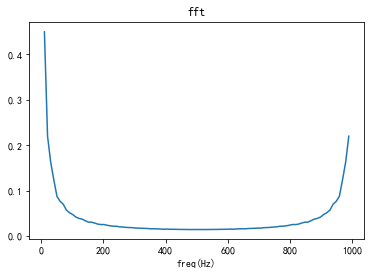

In [567]:
# Let's try frequency analysis with FFT
from scipy.fftpack import fft,ifft
import numpy as np
from matplotlib.pylab import mpl
y = data_mean["gsr"][100:200]
N = len(y)
fs = 1000
f = [fs/(N-1)*n for n in range(0,N)]

Y = np.fft.fft(y)*2/N #*2/N 反映了FFT变换的结果与实际信号幅值之间的关系
absY = [np.abs(x) for x in Y] #求傅里叶变换结果的模

plt.plot(f[1:-1],absY[1:-1])

plt.xlabel('freq(Hz)')

plt.title("fft")
plt.show()

In [590]:
import random
# for i,value in enumerate(data_mean["gsr"]):
#     if value == 0:
#         value = 0.0001
#     data_mean["gsr"][i] = 1/value
data_mean_normalized = normalize(data_mean)




In [607]:
N = len(data_mean["gsr"])
sample_num = 1000
indeces = random.sample(range(0,N),sample_num)
indeces.sort()
data_sampled = data_mean_normalized.iloc[indeces]
anno_sampled = anno_df.iloc[indeces]

# normailization

In [570]:
print(data_mean_normalized.iloc[indeces])

           gsr  emg_zygo  emg_coru  emg_trap       bvp
2     0.567173  0.058496  0.009362  0.093632  0.354308
5     0.605245  0.055500  0.005327  0.061304  0.289036
6     0.602793  0.068657  0.004489  0.047576  0.324532
9     0.595255  0.054385  0.006862  0.058484  0.523552
10    0.592270  0.070873  0.006861  0.046658  0.523827
...        ...       ...       ...       ...       ...
2434  0.239240  0.033592  0.000389  0.015737  0.415006
2438  0.234954  0.041225  0.003598  0.017276  0.494276
2443  0.229562  0.048419  0.004550  0.058497  0.479448
2444  0.228437  0.036107  0.002724  0.017609  0.456775
2445  0.227333  0.030198  0.000000  0.009490  0.503456

[1000 rows x 5 columns]


In [ ]:
plt.scatter(anno_sampled["arousal"],anno_sampled["arousal"])

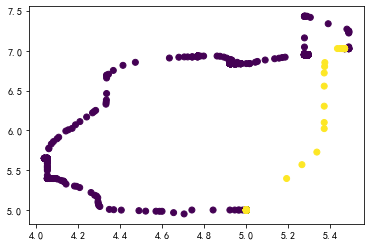

In [608]:
plt.scatter(anno_sampled["arousal"],anno_sampled["valence"],c =anno_sampled["video"] )

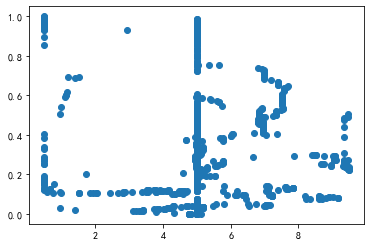

In [572]:
plt.scatter(anno_sampled["valence"],data_sampled["gsr"])

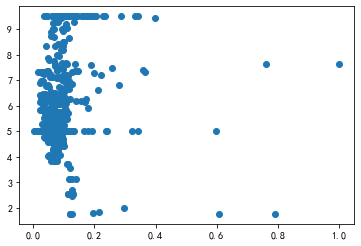

In [573]:
plt.scatter(data_sampled["emg_zygo"],anno_sampled["arousal"])

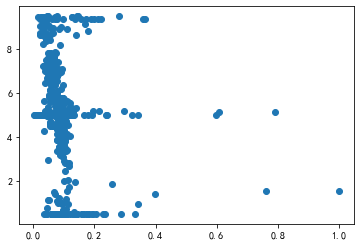

In [574]:
plt.scatter(data_sampled["emg_zygo"],anno_sampled["valence"])

In [438]:
import matplotlib.pyplot as mp, seaborn
# std
# data_anno = pd.concat([data_mean[["gsr","emg_coru"]],anno_df],axis=1)
# df_corr = data_anno.corr()
# seaborn.heatmap(df_corr,center = 0, annot = True, cmap = "YlGnBu")
# mp.show()

In [439]:

# # std
# data_anno = pd.concat([data_ex_dev[["gsr","emg_coru"]],anno_df],axis=1)
# df_corr = data_anno.corr()
# seaborn.heatmap(df_corr,center = 0, annot = True, cmap = "YlGnBu")
# mp.show()

In [440]:

# # std
# data_anno = pd.concat([data_std[["gsr","emg_coru"]],anno_df],axis=1)
# df_corr = data_anno.corr()
# seaborn.heatmap(df_corr,center = 0, annot = True, cmap = "YlGnBu")
# mp.show()

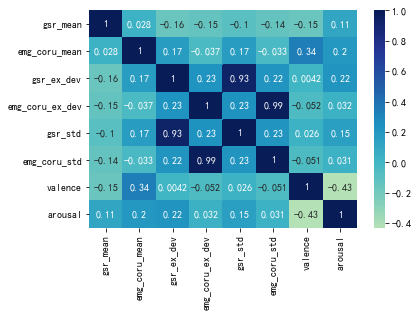

In [579]:
concact_data = pd.concat([data_mean["gsr"],data_mean["emg_coru"],data_ex_dev["gsr"],data_ex_dev["emg_coru"],data_std["gsr"],data_std["emg_coru"]],axis=1,keys=["gsr_mean","emg_coru_mean","gsr_ex_dev","emg_coru_ex_dev","gsr_std","emg_coru_std"])
data_anno = pd.concat([concact_data,anno_df],axis=1)
df_corr = data_anno.corr()
seaborn.heatmap(df_corr,center = 0, annot = True, cmap = "YlGnBu")
mp.show()

In [580]:
# let's try regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
def stdError_func(y_test, y):
  return np.sqrt(np.mean((y_test - y) ** 2))


def R2_1_func(y_test, y):
  return 1 - ((y_test - y) ** 2).sum() / ((y.mean() - y) ** 2).sum()


def R2_2_func(y_test, y):
  y_mean = np.array(y)
  y_mean[:] = y.mean()
  return 1 - stdError_func(y_test, y) / stdError_func(y_mean, y)

In [581]:
# multi-varialble linear fitting

x = np.array(concact_data.values)

y = np.array(anno_df["valence"].values)

cft = linear_model.LinearRegression()
print(x.shape)
cft.fit(x, y) #

print("model coefficients", cft.coef_)
print("model intercept", cft.intercept_)


predict_y =  cft.predict(x)
strError = stdError_func(predict_y, y)
R2_1 = R2_1_func(predict_y, y)
R2_2 = R2_2_func(predict_y, y)
score = cft.score(x, y) ##

print('strError={:.2f}, R2_1={:.2f},  R2_2={:.2f}, clf.score={:.2f}'.format(
    strError,R2_1,R2_2,score))

(2452, 6)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [444]:

poly_reg =PolynomialFeatures(degree=2) #三次多项式
X_ploy =poly_reg.fit_transform(x)
lin_reg_2=linear_model.LinearRegression()
lin_reg_2.fit(X_ploy,y)
predict_y =  lin_reg_2.predict(X_ploy)
strError = stdError_func(predict_y, y)
R2_1 = R2_1_func(predict_y, y)
R2_2 = R2_2_func(predict_y, y)
score = lin_reg_2.score(X_ploy, y) ##sklearn中自带的模型评估，与R2_1逻辑相同

print("coefficients", lin_reg_2.coef_)
print("intercept", lin_reg_2.intercept_)
print('degree={}: strError={:.2f}, R2_1={:.2f},  R2_2={:.2f}, clf.score={:.2f}'.format(
    3, strError,R2_1,R2_2,score))

coefficients [-3.23540118e-08  9.91023979e-01  2.65734594e-01 -1.61840118e+01
  1.60157624e-01 -3.02627516e+01 -8.29981264e-01 -5.86193511e-02
 -3.19420661e-03  1.63854320e+00 -9.03687687e-03 -7.67822216e-01
  3.45117141e-02 -1.09670197e-03  4.41403886e-01 -8.54612398e-05
 -8.21282541e-01 -4.34822580e-03  1.05273193e+01  1.07555591e-01
 -2.99404374e+02 -2.46310246e+00  5.28892628e-04  1.25888440e-01
 -1.14960839e-02  9.14319543e+02  5.59828492e+00  5.57213584e-02]
intercept 0.9527588964862117
degree=3: strError=1.43, R2_1=0.44,  R2_2=0.25, clf.score=0.44


In [522]:
# feature selection
from sklearn import feature_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
import sys
X = np.array(concact_data)
Y = np.array(anno_df["valence"])
names =concact_data.columns.values.tolist()

rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X.shape[1]):
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True))


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=3, train_size=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=3, train_size=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=3, train_size=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass test_size=3, train_size=0.3 as keyword args. 

[(-1425.626, 'emg_coru_ex_dev'), (-1463.77, 'emg_coru_mean'), (-2956.855, 'gsr_ex_dev'), (-6473.158, 'emg_coru_std'), (-9891.299, 'gsr_mean'), (-14146.352, 'gsr_std')]


In [523]:
from sklearn.model_selection import train_test_split
# split train set and test set X Y
X_train, X_test, Y_train, Y_test =train_test_split(XNew, Y, test_size=0.2, shuffle=True)
print("X train size: {}, Y train size: {}".format(len(X_train), len(Y_train)))
print("X test size: {}, Y test size: {}".format(len(X_test), len(Y_test)))


X train size: 980, Y train size: 980
X test size: 246, Y test size: 246


In [524]:
X_train.shape

(980, 4)

In [525]:
# try svm
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train,Y_train)
svr_y_predict = svr.predict(X_test)

In [526]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("r2 score",r2_score(Y_test,svr_y_predict))

r2 score 0.15148021012973


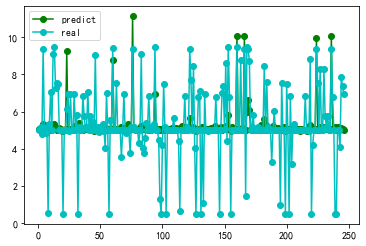

In [527]:
r = len(X_test) + 1
plt.plot(np.arange(1,r), svr_y_predict, 'go-', label="predict")
plt.plot(np.arange(1,r), Y_test, 'co-', label="real")
plt.legend()
plt.show()